In [316]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.interpolate import griddata


In [317]:
# load simulation square numpy file
path = "./"
files = os.listdir(path)

npy_path = os.path.join(path, "simulation_square.npy")
data = np.load(npy_path)
print("muyao's simualation square npy shape: ", data.shape)

muyao's simualation square npy shape:  (200, 225000)


In [318]:
# load MATLAB simulation data csv
simulation_data = pd.read_csv(os.path.join(path, "SimulationModel/results.csv"))
print("simulation data shape: ", simulation_data.shape)
print("simulation data columns: ", list(simulation_data.columns))

simulation data shape:  (8641, 304)
simulation data columns:  ['Node_ID', 'X', 'Y', 'T_0', 'T_2', 'T_4', 'T_6', 'T_8', 'T_10', 'T_12', 'T_14', 'T_16', 'T_18', 'T_20', 'T_22', 'T_24', 'T_26', 'T_28', 'T_30', 'T_32', 'T_34', 'T_36', 'T_38', 'T_40', 'T_42', 'T_44', 'T_46', 'T_48', 'T_50', 'T_52', 'T_54', 'T_56', 'T_58', 'T_60', 'T_62', 'T_64', 'T_66', 'T_68', 'T_70', 'T_72', 'T_74', 'T_76', 'T_78', 'T_80', 'T_82', 'T_84', 'T_86', 'T_88', 'T_90', 'T_92', 'T_94', 'T_96', 'T_98', 'T_100', 'T_102', 'T_104', 'T_106', 'T_108', 'T_110', 'T_112', 'T_114', 'T_116', 'T_118', 'T_120', 'T_122', 'T_124', 'T_126', 'T_128', 'T_130', 'T_132', 'T_134', 'T_136', 'T_138', 'T_140', 'T_142', 'T_144', 'T_146', 'T_148', 'T_150', 'T_152', 'T_154', 'T_156', 'T_158', 'T_160', 'T_162', 'T_164', 'T_166', 'T_168', 'T_170', 'T_172', 'T_174', 'T_176', 'T_178', 'T_180', 'T_182', 'T_184', 'T_186', 'T_188', 'T_190', 'T_192', 'T_194', 'T_196', 'T_198', 'T_200', 'T_202', 'T_204', 'T_206', 'T_208', 'T_210', 'T_212', 'T_214',

In [319]:
# extract coordinates and temperatures
x = simulation_data['X'].values  # x-coordinates of nodes
y = simulation_data['Y'].values  # y-coordinates of nodes
temperatures = simulation_data.iloc[:, 3:].values  # temperature of nodes
num_time_steps = temperatures.shape[1]

print(f"loaded data: {x.shape}, {y.shape}, {temperatures.shape} ")
print("num time steps: ", num_time_steps)

loaded data: (8641,), (8641,), (8641, 301) 
num time steps:  301


<function matplotlib.pyplot.show(close=None, block=None)>

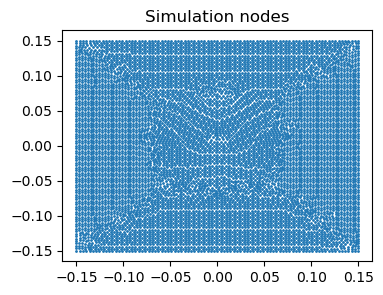

In [ ]:
# plot simulation nodes
plt.figure(figsize=(4, 3))
plt.scatter(x, y, s=1) 
plt.title("Simulation nodes")
plt.show()

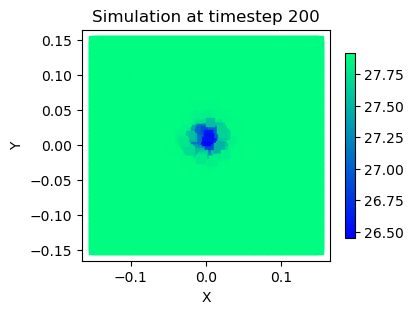

In [321]:

timestep = 200 # choose specific timeframe
temp_at_timestep = temperatures[:, timestep]  # Get temperature values for the chosen frame

# plot the raw scattered data
plt.figure(figsize=(4, 3))
sc = plt.scatter(x, y, c=temp_at_timestep, cmap='winter', marker='s')
plt.colorbar(sc, shrink=0.8)
plt.xlabel("X")
plt.ylabel("Y")
plt.title(f"Simulation at timestep {timestep}")
plt.show()

In [322]:
# create meshgrid for pixel data
grid_x, grid_y = np.meshgrid(
    np.linspace(x.min(), x.max(), 640),
    np.linspace(y.min(), y.max(), 480)
)

# initialize pixel grid for temperatures
grid_temperatures = np.zeros((grid_x.shape[0], grid_x.shape[1], temperatures.shape[1]))

# interpolate temperatures for each time step
for i in range(temperatures.shape[1]):
    grid_temperatures [:,:,i] = griddata(
    points=(x, y), # input coordinates
    values=temperatures[:,i], # temperatures at input coordinates
    xi=(grid_x, grid_y), # grid coordinates for interpolation
    method='nearest'  
    )

print("interpolated temperatures: ", grid_temperatures.shape)

interpolated temperatures:  (480, 640, 301)


In [323]:
# transpose to make time axis the first dimension
grid_temperatures_transposed = np.transpose(grid_temperatures, (2, 0, 1)) 

# flatten the grid to have shape (time steps, 307200)
flattened_temperatures = grid_temperatures_transposed.reshape(num_time_steps, -1)

print("final shape: ", flattened_temperatures.shape)  # should be (num time steps, 307200)

final shape:  (301, 307200)


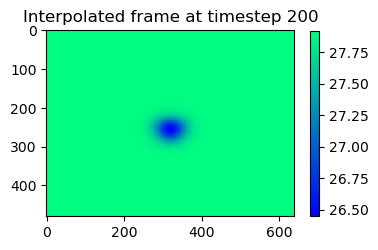

In [324]:
# plot interpolated frame
frame = flattened_temperatures[timestep, :].reshape((480, 640))

plt.figure(figsize=(4,3))
plt.imshow(frame, cmap='winter')
plt.colorbar(shrink=0.8)
plt.title(f"Interpolated frame at timestep {timestep}")
plt.show()

In [325]:
# load ansys simulation data
path = "SimulationModel/simulation results.csv"
ansys_data = pd.read_csv(path)
matlab_data = simulation_data

print("ansys simulation data shape: ", ansys_data.shape)
print("MATLAB simulation data shape: ", matlab_data.shape)

print(ansys_data.head(2))
print(matlab_data.head(2))

ansys simulation data shape:  (6058, 303)
MATLAB simulation data shape:  (8641, 304)
           0          1          2          3          4          5  \
0  23.313496  24.068754  24.711421  25.258436  25.721381  26.113621   
1  23.235396  23.903862  24.502647  25.032817  25.495869  25.898304   

           6          7          8          9  ...        293        294  \
0  26.447865  26.734974  26.983757  27.201192  ...  22.140491  22.139064   
1  26.247947  26.552403  26.818495  27.052107  ...  22.135130  22.133733   

         295        296        297        298        299  NODE_ID  Xloc  Yloc  
0  22.137658  22.136274  22.134911  22.133569  22.132246        1   0.3   0.0  
1  22.132357  22.131003  22.129669  22.128356  22.127062        2   0.0   0.0  

[2 rows x 303 columns]
   Node_ID     X     Y  T_0        T_2        T_4        T_6        T_8  \
0        8 -0.15 -0.15   22  22.580786  22.997065  23.317868  23.579848   
1        9 -0.15  0.15   22  22.576710  22.993075  23.3153

In [326]:
# extract coordinates and temperatures
x_ansys = ansys_data['Xloc'].values  # x-coordinates of nodes
y_ansys= ansys_data['Yloc'].values  # y-coordinates of nodes
temperatures_ansys = ansys_data.iloc[:, :-3].values  # temperature of nodes
num_time_steps = temperatures_ansys.shape[1]

print(f"loaded ansys data: {x_ansys.shape}, {y_ansys.shape}, {temperatures_ansys.shape} ")
print(f"loaded matlab data: {x.shape}, {y.shape}, {temperatures.shape}")
print("num time steps: ", num_time_steps)


loaded ansys data: (6058,), (6058,), (6058, 300) 
loaded matlab data: (8641,), (8641,), (8641, 301)
num time steps:  300


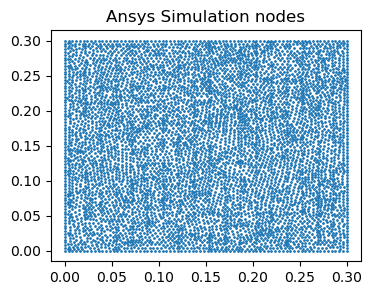

In [327]:
# plot simulation nodes
plt.figure(figsize=(4, 3))
plt.scatter(x_ansys, y_ansys, s=1) 
plt.title("Ansys Simulation nodes")
plt.show()

22.547077664124423
22.54383973120754
23.53381475565304
23.734939685381317
23.7667095331109
23.754904977486134
23.74732748845105
23.76121484148388
23.771512770825023
23.763318754577984
23.79762024999615
23.73588313792161
23.77463028856537
23.8017658251066
23.811004793405704
23.776529617942806
23.77798278457088
23.78101774112779
23.756453795320112
23.77746835863356
23.799207209382
23.752965687184638
23.73560620907647
23.74915084710977
23.75265969046758
23.754405845435
23.766093233712606
23.75272881953293
23.71612733275085
23.702024767583072
23.57235724176478
22.55193779669032
23.50639166973356
23.718488113755843
23.73991894103635
23.755979733508894
23.78044108902165
23.745359907396352
23.75603419843461
23.760599312747907
23.80118330937334
23.80970391973536
23.771181148572506
23.76689887627247
23.778615297152907
23.77151825841751
23.80282855287462
23.75341066905263
23.76598722711748
23.795203994642
23.76504756854532
23.744823740900223
23.74135032286932
23.744915056567184
23.74680910249338

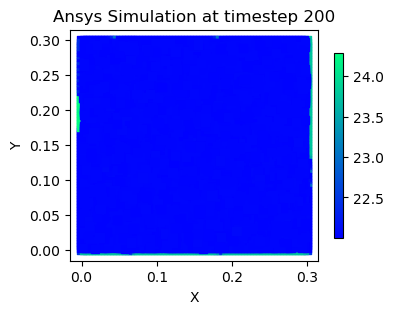

In [328]:
 # choose specific timeframe
temp_at_timestep = temperatures_ansys[:, timestep]  # Get temperature values for the chosen frame

for temp in temp_at_timestep:
    print(temp)

# plot the raw scattered data
plt.figure(figsize=(4, 3))
sc = plt.scatter(x_ansys, y_ansys, c=temp_at_timestep, cmap='winter', marker='s')
plt.colorbar(sc, shrink=0.8)
plt.xlabel("X")
plt.ylabel("Y")
plt.title(f"Ansys Simulation at timestep {timestep}")
plt.show()

In [329]:
# create meshgrid for pixel data
grid_x, grid_y = np.meshgrid(
    np.linspace(x_ansys.min(), x_ansys.max(), 640),
    np.linspace(y_ansys.min(), y_ansys.max(), 480)
)

# initialize pixel grid for temperatures
ansys_grid_temperatures = np.zeros((grid_x.shape[0], grid_x.shape[1], num_time_steps))

# interpolate temperatures for each time step
for i in range(num_time_steps):
    ansys_grid_temperatures [:,:,i] = griddata(
    points=(x_ansys, y_ansys), # input coordinates
    values=temperatures_ansys[:,i], # temperatures at input coordinates
    xi=(grid_x, grid_y), # grid coordinates for interpolation
    method='nearest'  
)

print("interpolated temperatures: ", ansys_grid_temperatures.shape)

interpolated temperatures:  (480, 640, 300)


In [330]:
# transpose to make time axis the first dimension
ansys_grid_transposed = np.transpose(ansys_grid_temperatures, (2, 0, 1))

# flatten the grid to have shape (time steps, 307200)
ansys_flattened_temperatures = ansys_grid_transposed.reshape(num_time_steps, -1)  
print("final shape: ", ansys_flattened_temperatures.shape) # should be (num time steps, 307200)

# dataframe to save the interpolated data
ansys_flattened_temperatures_df = pd.DataFrame(ansys_flattened_temperatures)


final shape:  (300, 307200)


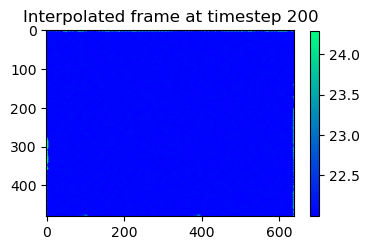

In [331]:
# plot interpolated frame
ansys_frame = ansys_flattened_temperatures[timestep, :].reshape((480, 640))

plt.figure(figsize=(4,3))
plt.imshow(ansys_frame, cmap='winter')
plt.colorbar(shrink=0.8)
plt.title(f"Interpolated frame at timestep {timestep}")
plt.show()

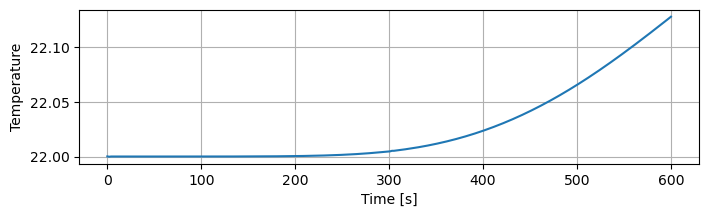

In [332]:
p_temp = ansys_flattened_temperatures[:,10000] 
t = np.linspace(0, 600, 300) 

plt.figure(figsize=(8,2))
plt.plot(t, p_temp)
plt.xlabel('Time [s]')
plt.ylabel('Temperature')
plt.grid('on')
plt.show()

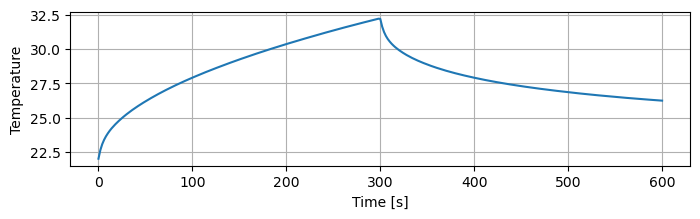

In [333]:
p_temp = flattened_temperatures[:,10000] 
t = np.linspace(0, 600, 301) 

plt.figure(figsize=(8,2))
plt.plot(t, p_temp)
plt.xlabel('Time [s]')
plt.ylabel('Temperature')
plt.grid('on')
plt.show()